In [1]:
___Author___='LumberJack Jyss'

In [2]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [3]:
print('Importing librairies...')
import numpy as np
import pandas as pd
import talib
from zigzag import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
print('Librairies imported')

Importing librairies...
Librairies imported


In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('AMZN_5Y.csv')
df = df.iloc[1:,1:-1]

In [6]:
df.head()

Date     Open     High      Low    Close
1  20140606  325.130  330.800  324.925  329.665
2  20140609  331.235  332.945  325.695  327.495
3  20140610  327.775  335.475  327.510  332.430
4  20140611  336.000  340.570  333.920  335.195
5  20140612  335.705  335.705  324.760  325.940

In [7]:
df.shape

(1256, 5)

In [8]:
df.tail()

Date      Open      High       Low     Close
1252  20190528  1832.275  1849.275  1827.905  1836.080
1253  20190529  1823.785  1829.655  1807.750  1819.715
1254  20190530  1824.335  1829.345  1807.890  1816.275
1255  20190531  1790.005  1795.480  1773.010  1774.865
1256  20190603  1761.330  1766.275  1704.500  1719.745

In [9]:
delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')

Période d'étude :  1256
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1005  jours 
Bloc 2 : 251  jours


In [10]:
dataset_1D = df.copy()
dataset_1D.head()

Date     Open     High      Low    Close
1  20140606  325.130  330.800  324.925  329.665
2  20140609  331.235  332.945  325.695  327.495
3  20140610  327.775  335.475  327.510  332.430
4  20140611  336.000  340.570  333.920  335.195
5  20140612  335.705  335.705  324.760  325.940

In [11]:
dataset_1D.tail()

Date      Open      High       Low     Close
1252  20190528  1832.275  1849.275  1827.905  1836.080
1253  20190529  1823.785  1829.655  1807.750  1819.715
1254  20190530  1824.335  1829.345  1807.890  1816.275
1255  20190531  1790.005  1795.480  1773.010  1774.865
1256  20190603  1761.330  1766.275  1704.500  1719.745

In [12]:
rsi = talib.RSI(dataset_1D['Close'],timeperiod=2)
upper, middle, lower =  talib.BBANDS(dataset_1D['Close'], timeperiod=9, nbdevup=2, nbdevdn=2,matype=0)
sma5 = talib.SMA(dataset_1D['Close'],timeperiod=5)
sma8 = talib.SMA(dataset_1D['Close'],timeperiod=8)
sma10 = talib.SMA(dataset_1D['Close'],timeperiod=10)
sma12 = talib.SMA(dataset_1D['Close'],timeperiod=12)
sma15 = talib.SMA(dataset_1D['Close'],timeperiod=15)
sma30 = talib.SMA(dataset_1D['Close'],timeperiod=30)
sma35 = talib.SMA(dataset_1D['Close'],timeperiod=35)
sma40 = talib.SMA(dataset_1D['Close'],timeperiod=40)
sma45 = talib.SMA(dataset_1D['Close'],timeperiod=45)
sma50 = talib.SMA(dataset_1D['Close'],timeperiod=50)

delta5_8 = sma5 - sma8
delta8_10 = sma8 - sma10
delta10_12 = sma10 - sma12
delta12_15 = sma12 - sma15
delta15_30 = sma15 - sma30
delta30_35 = sma30 - sma35
delta35_40 = sma35 - sma40
delta40_45 = sma40 - sma45
delta45_50 = sma45 - sma50

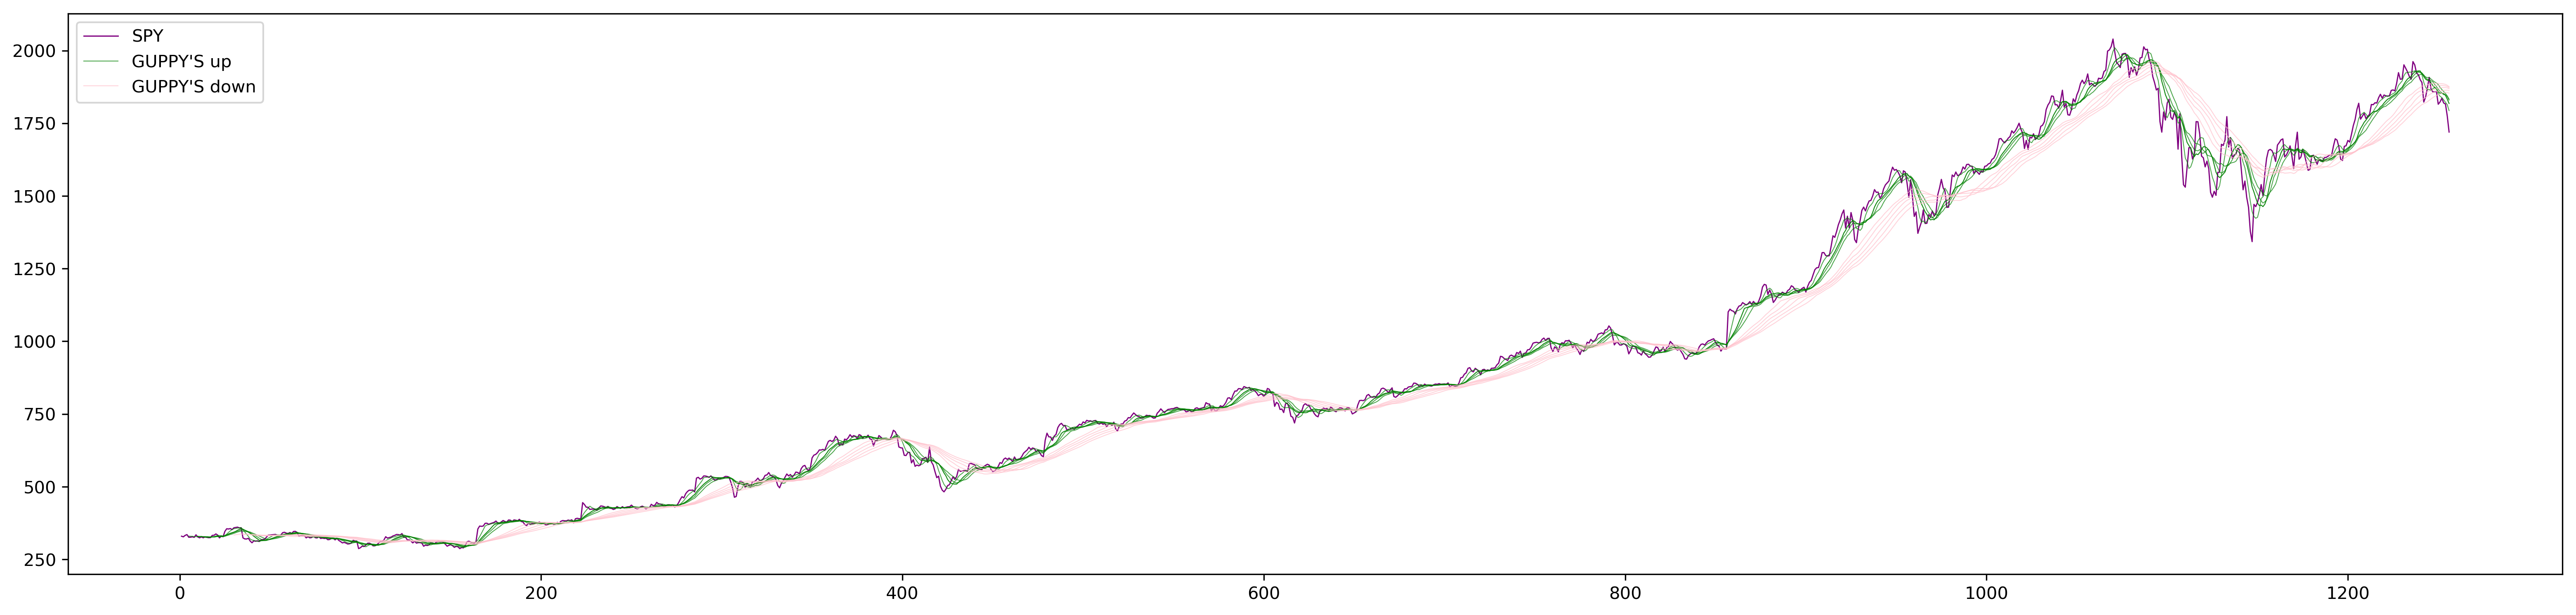

In [13]:
plt.figure(figsize=(26,6),dpi=300)
plt.plot(dataset_1D['Close'],label = 'SPY',color='purple',lw=0.7)
plt.plot(sma5,label = "GUPPY'S up", color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma10, color='g', alpha=0.7,lw=0.5)
plt.plot(sma12, color='g', alpha=0.7,lw=0.5)
plt.plot(sma15, color='g', alpha=0.7,lw=0.5)
plt.plot(sma30, label = "GUPPY'S down", color='pink', alpha=0.7,lw=0.5)
plt.plot(sma35, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma40, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma45, color='pink', alpha=0.7,lw=0.5)
plt.plot(sma50, color='pink', alpha=0.7,lw=0.5)
plt.legend()
plt.show()

In [14]:
delta5_8.shape,delta8_10.shape, delta10_12.shape, delta12_15.shape, delta15_30 .shape,delta30_35.shape,delta35_40.shape,delta40_45.shape, delta45_50.shape

((1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,),
 (1256,))

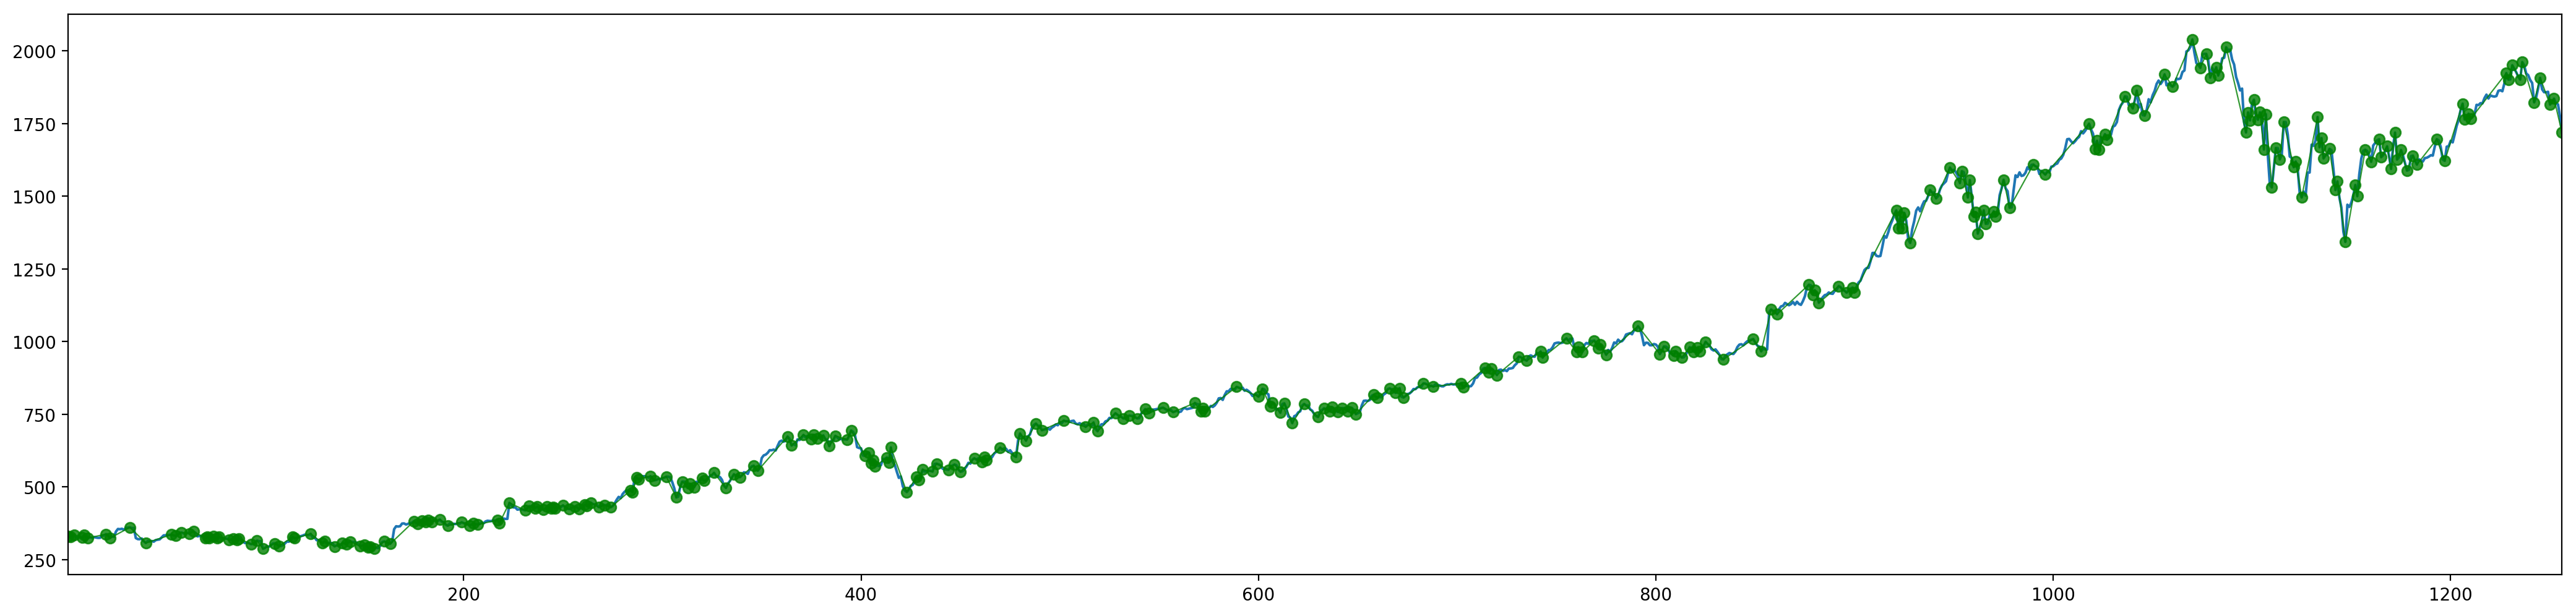

In [15]:
X = dataset_1D['Close']
pivots = peak_valley_pivots(X.values, 0.01, -0.01)
ts_pivots = pd.Series(X, index=X.index)
ts_pivots = ts_pivots[pivots != 0]
plt.figure(figsize=(26,6),dpi=200)
X.plot()
ts_pivots.plot(style='g-o',lw=0.8,alpha=0.8);

peak = []
valley = []

for i in range(0,dataset_1D.shape[0]):
    if pivots[i] == 1:
        peak.append(pivots[i])
        valley.append(0)
    elif pivots[i] == -1:
        peak.append(0)
        valley.append(pivots[i])
    else:
        peak.append(0)
        valley.append(0)
        

In [16]:
len(pivots)

1256

In [17]:
bbdelta = upper - middle
price_bolup = dataset_1D['Close'] - lower
price_bolow = dataset_1D['Close'] - upper

In [18]:
ts_pivots.shape,bbdelta.shape,price_bolup.shape,price_bolow.shape

((318,), (1256,), (1256,), (1256,))

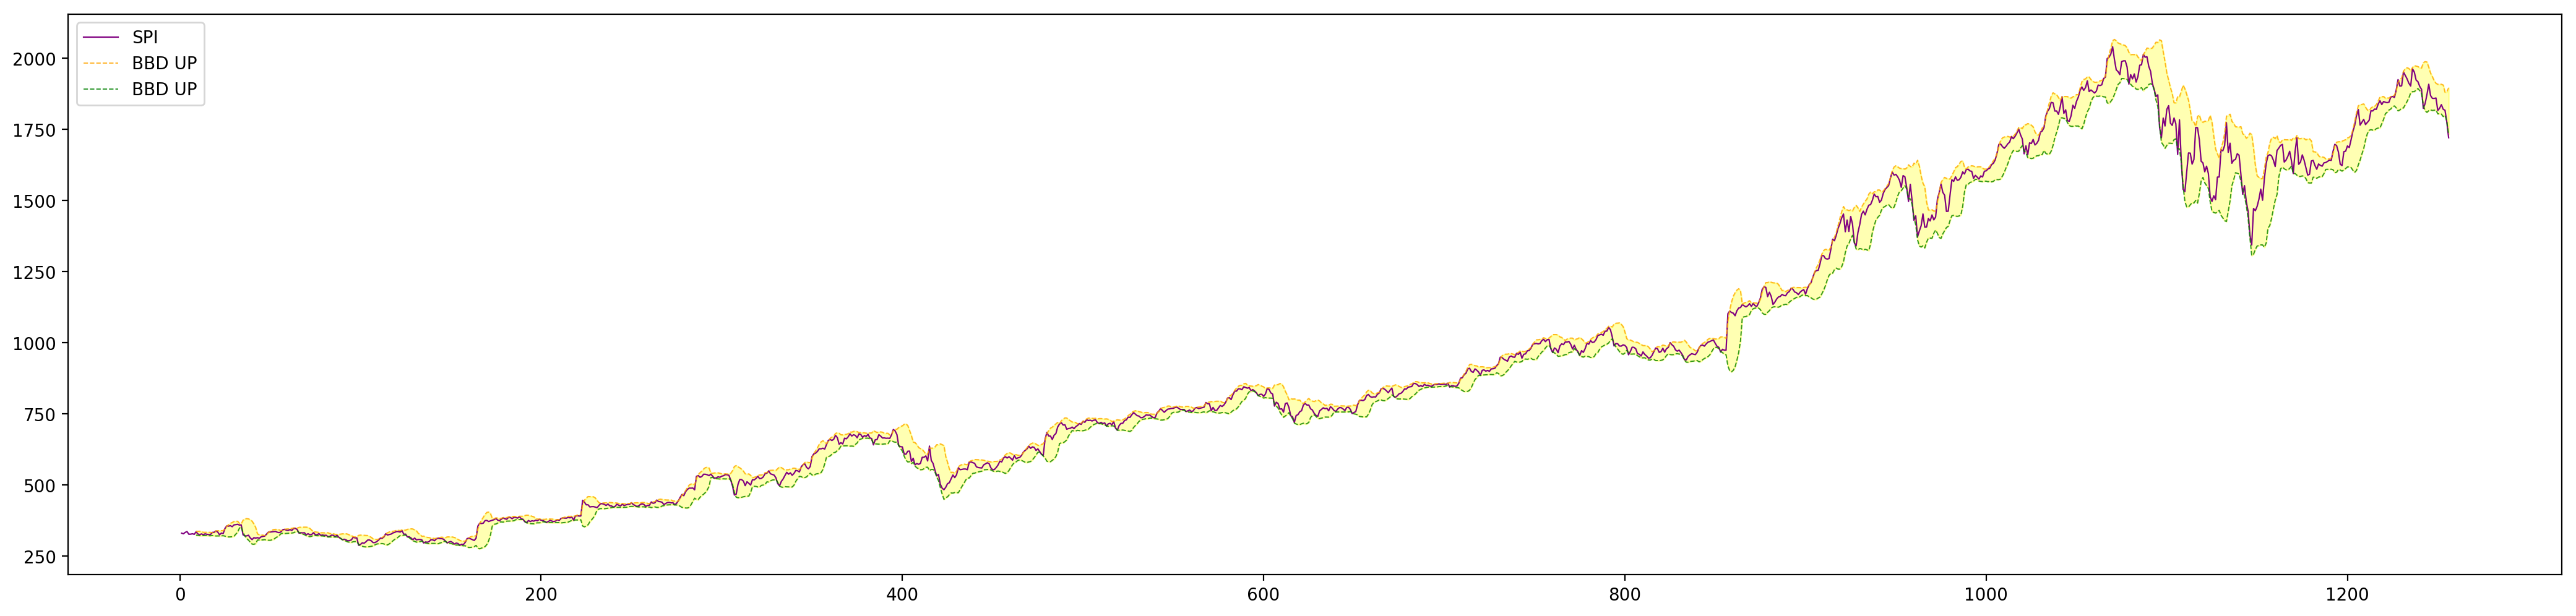

In [19]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPI',color='purple',lw=0.8)
plt.plot(upper,label='BBD UP',color = 'orange',linestyle='--',lw=0.7,alpha=0.8)
plt.plot(lower,label='BBD UP',color = 'green',linestyle='--',lw=0.7,alpha=0.8)
plt.fill_between(x=dataset_1D.index,y1=upper,y2=lower,color='yellow',alpha=0.3)
plt.legend()
plt.show()

In [20]:
rsi25_list = []
rsi75_list = []
for i in range(0,dataset_1D.shape[0]):
    try:
        rsi75_list.append(95 - rsi[i])
        rsi25_list.append(rsi[i] - 5)
    except:
        rsi75_list.append(0)
        rsi25_list.append(0)

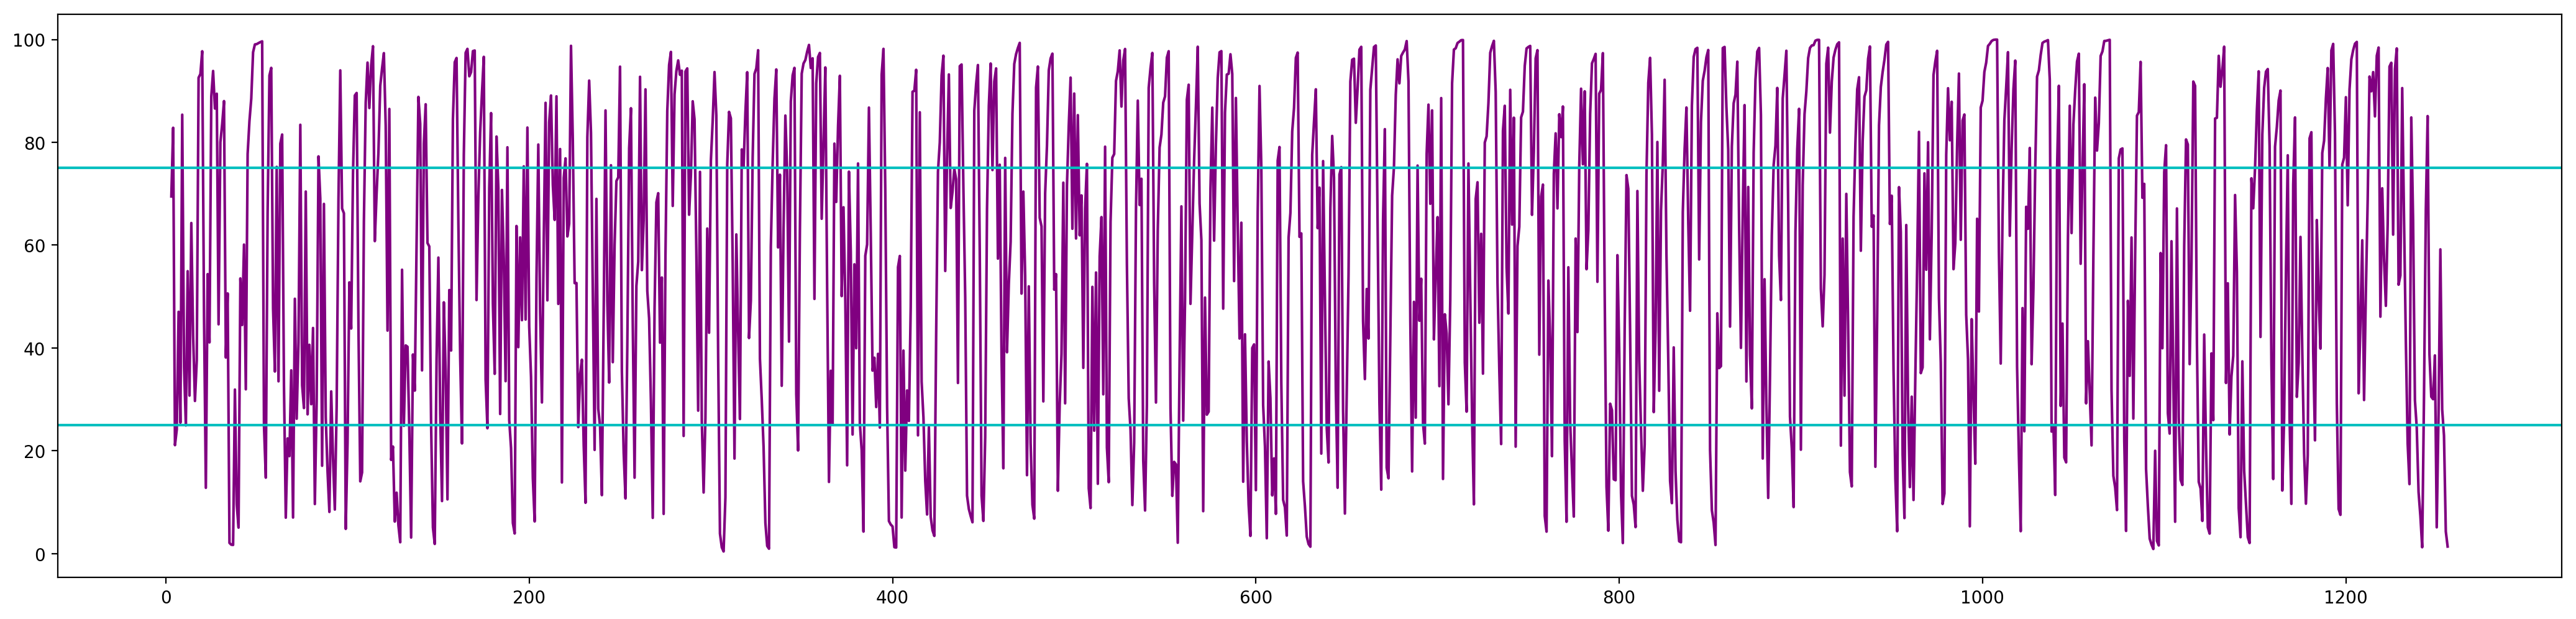

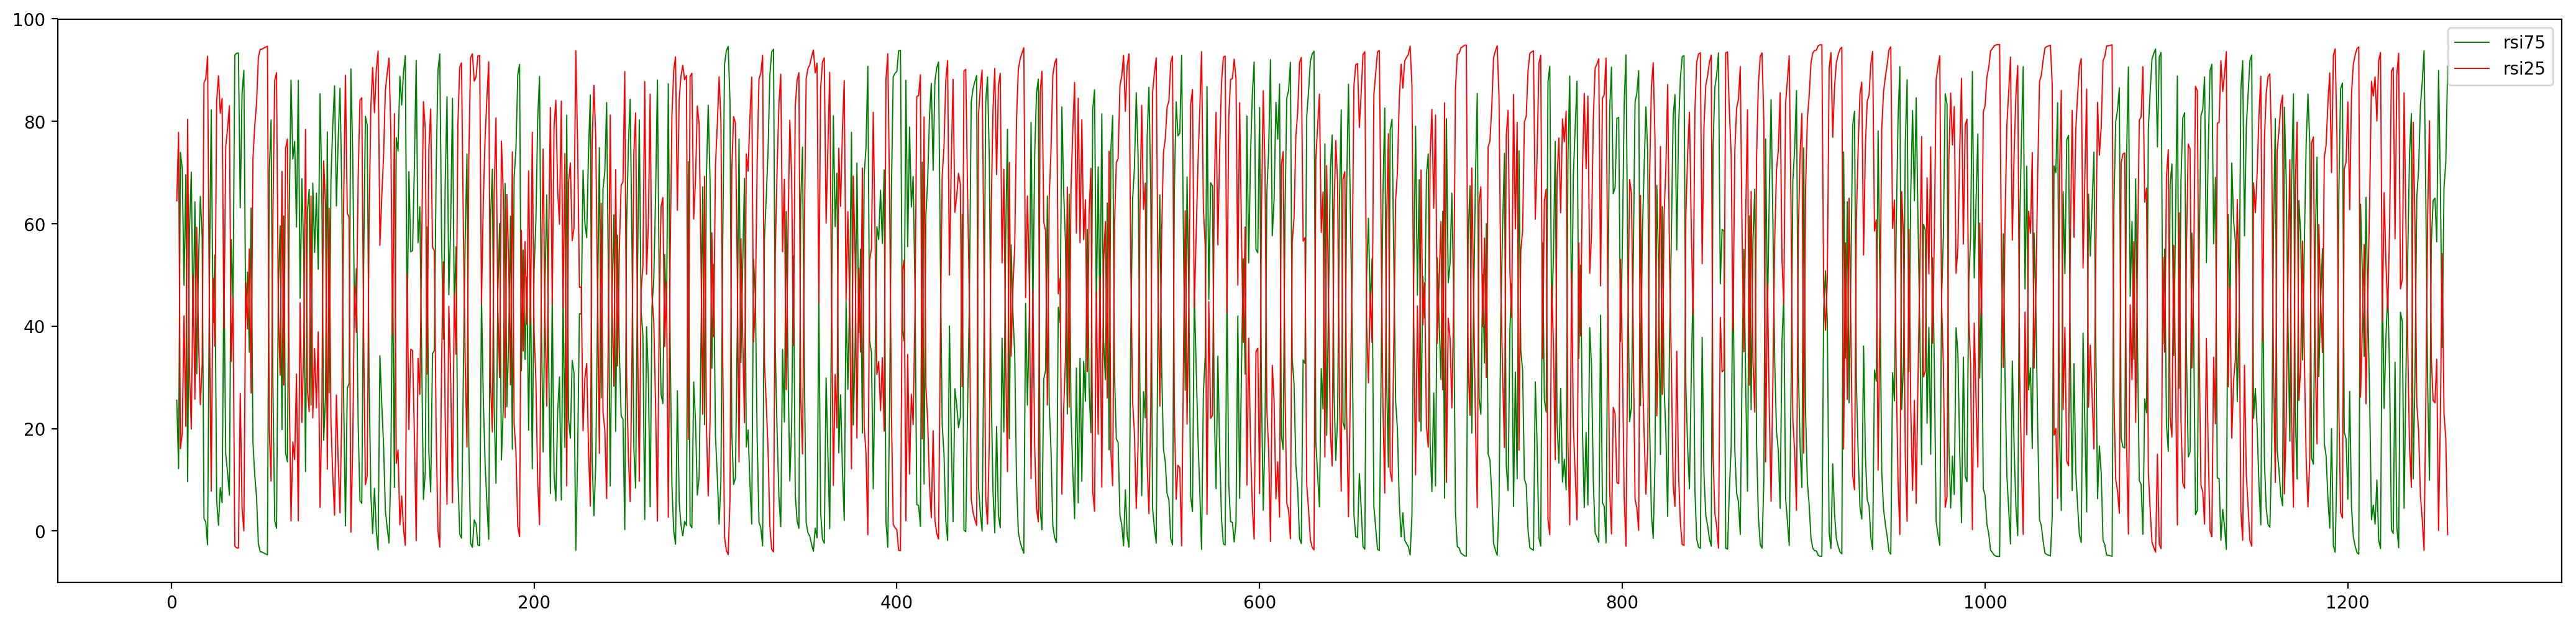

In [21]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi,label = 'RSI',color='purple')
plt.axhline(y=75,color='c')
plt.axhline(y=25,color='c')

plt.figure(figsize=(26,6),dpi=200)
plt.plot(rsi75_list,label='rsi75',color='green',lw=0.7)
plt.plot(rsi25_list,label='rsi25',color='r',lw=0.7)

plt.legend()
plt.show()

In [22]:
varop_spy = dataset_1D['Open'] - dataset_1D['Close']
varhl_spy = dataset_1D['High'] - dataset_1D['Low']

In [23]:
varop_spy.shape,varhl_spy.shape

((1256,), (1256,))

In [24]:
dataset_1D['Varop_Spy'] = varop_spy
dataset_1D['Varhl_spy'] = varhl_spy
dataset_1D['RSI'] = rsi
dataset_1D['75 - RSI'] = np.array(rsi75_list)
dataset_1D['RSI - 25'] = np.array(rsi25_list)

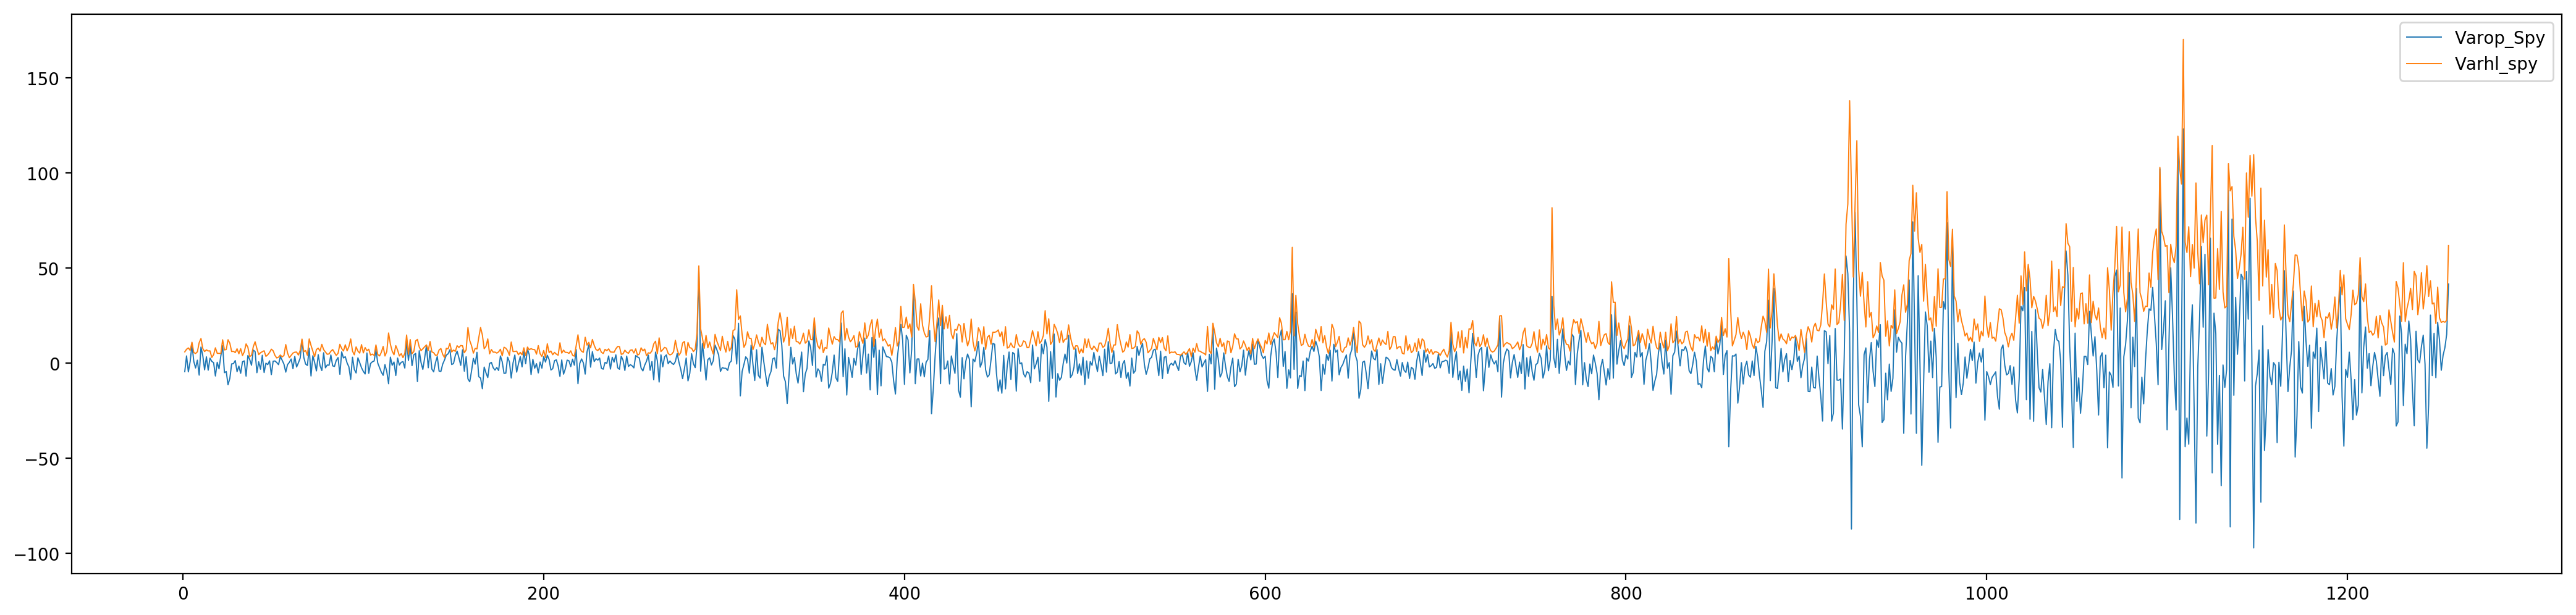

In [25]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Varop_Spy'],label = 'Varop_Spy',lw=0.7)
plt.plot(dataset_1D['Varhl_spy'],label = 'Varhl_spy',lw=0.7)
plt.legend()

In [26]:
dataset_1D.tail()

Date      Open      High       Low     Close  Varop_Spy  Varhl_spy  \
1252  20190528  1832.275  1849.275  1827.905  1836.080     -3.805     21.370   
1253  20190529  1823.785  1829.655  1807.750  1819.715      4.070     21.905   
1254  20190530  1824.335  1829.345  1807.890  1816.275      8.060     21.455   
1255  20190531  1790.005  1795.480  1773.010  1774.865     15.140     22.470   
1256  20190603  1761.330  1766.275  1704.500  1719.745     41.585     61.775   

            RSI   75 - RSI   RSI - 25  
1252  59.166499  67.736397  22.263603  
1253  28.031797  35.833501  54.166499  
1254  22.953767  66.968203  23.031797  
1255   4.281340  72.046233  17.953767  
1256   1.352452  90.718660  -0.718660

In [27]:
dataset_1D['BBD_Delta_Up'] = bbdelta

dataset_1D.tail()

Date      Open      High       Low     Close  Varop_Spy  Varhl_spy  \
1252  20190528  1832.275  1849.275  1827.905  1836.080     -3.805     21.370   
1253  20190529  1823.785  1829.655  1807.750  1819.715      4.070     21.905   
1254  20190530  1824.335  1829.345  1807.890  1816.275      8.060     21.455   
1255  20190531  1790.005  1795.480  1773.010  1774.865     15.140     22.470   
1256  20190603  1761.330  1766.275  1704.500  1719.745     41.585     61.775   

            RSI   75 - RSI   RSI - 25  BBD_Delta_Up  
1252  59.166499  67.736397  22.263603     52.462173  
1253  28.031797  35.833501  54.166499     55.394935  
1254  22.953767  66.968203  23.031797     40.472912  
1255   4.281340  72.046233  17.953767     51.875082  
1256   1.352452  90.718660  -0.718660     81.675557

In [28]:
dataset_1D['delta5_8'] = delta5_8
dataset_1D['delta8_10'] = delta8_10
dataset_1D['delta10_12'] = delta10_12
dataset_1D['delta12_15'] = delta12_15
dataset_1D['delta15_30'] = delta15_30
dataset_1D['delta30_35'] = delta30_35
dataset_1D['delta35_40'] = delta35_40
dataset_1D['delta40_45'] = delta40_45
dataset_1D['delta45_50'] = delta45_50

In [29]:
dataset_1D.tail()

Date      Open      High       Low     Close  Varop_Spy  Varhl_spy  \
1252  20190528  1832.275  1849.275  1827.905  1836.080     -3.805     21.370   
1253  20190529  1823.785  1829.655  1807.750  1819.715      4.070     21.905   
1254  20190530  1824.335  1829.345  1807.890  1816.275      8.060     21.455   
1255  20190531  1790.005  1795.480  1773.010  1774.865     15.140     22.470   
1256  20190603  1761.330  1766.275  1704.500  1719.745     41.585     61.775   

            RSI   75 - RSI   RSI - 25  BBD_Delta_Up   delta5_8  delta8_10  \
1252  59.166499  67.736397  22.263603     52.462173 -14.854875  -0.484625   
1253  28.031797  35.833501  54.166499     55.394935 -11.467625  -9.451375   
1254  22.953767  66.968203  23.031797     40.472912 -13.628750 -10.429750   
1255   4.281340  72.046233  17.953767     51.875082 -11.327625  -7.552875   
1256   1.352452  90.718660  -0.718660     81.675557 -14.751500  -9.980500   

      delta10_12  delta12_15  delta15_30  delta30_35  delta35_40  delta40_45  \
1252   -0.442667  -11.799500  -20.048167    5.992548    7.351286   10.765556   
1253    3.357000  -10.786000  -26.063333    6.010476    6.365857    9.880444   
1254   -1.578583   -4.641583  -31.210833    5.028214    5.731911    9.229708   
1255   -9.431500   -1.725000  -36.571833    4.100405    4.806179    7.892583   
1256  -11.639917   -3.011083  -43.188500    2.939214    3.742536    6.595639   

      delta45_50  
1252    8.482944  
1253    7.945656  
1254    7.589667  
1255    8.241367  
1256    9.024711

In [30]:
len(peak),len(valley),len(ts_pivots)

(1256, 1256, 318)

In [31]:
modes = pivots_to_modes(pivots)
pd.Series(X).pct_change().groupby(modes).describe().unstack()

count  -1    503.000000
        1    752.000000
mean   -1     -0.012580
        1      0.010912
std    -1      0.014634
        1      0.015512
min    -1     -0.096853
        1     -0.009946
25%    -1     -0.017359
        1      0.001775
50%    -1     -0.008917
        1      0.008134
75%    -1     -0.003596
        1      0.015650
max    -1      0.009852
        1      0.141328
dtype: float64

In [32]:
compute_segment_returns(X, pivots).sum()

0.0

In [33]:

max_drawdown(np.array(X))

0.3416671160813653

In [34]:
dataset_1D['Peaks'] = abs(np.array(peak))
dataset_1D['Valley'] = abs(np.array(valley))
dataset_1D.tail()

Date      Open      High       Low     Close  Varop_Spy  Varhl_spy  \
1252  20190528  1832.275  1849.275  1827.905  1836.080     -3.805     21.370   
1253  20190529  1823.785  1829.655  1807.750  1819.715      4.070     21.905   
1254  20190530  1824.335  1829.345  1807.890  1816.275      8.060     21.455   
1255  20190531  1790.005  1795.480  1773.010  1774.865     15.140     22.470   
1256  20190603  1761.330  1766.275  1704.500  1719.745     41.585     61.775   

            RSI   75 - RSI   RSI - 25  ...  delta8_10  delta10_12  delta12_15  \
1252  59.166499  67.736397  22.263603  ...  -0.484625   -0.442667  -11.799500   
1253  28.031797  35.833501  54.166499  ...  -9.451375    3.357000  -10.786000   
1254  22.953767  66.968203  23.031797  ... -10.429750   -1.578583   -4.641583   
1255   4.281340  72.046233  17.953767  ...  -7.552875   -9.431500   -1.725000   
1256   1.352452  90.718660  -0.718660  ...  -9.980500  -11.639917   -3.011083   

      delta15_30  delta30_35  delta35_40  delta40_45  delta45_50  Peaks  \
1252  -20.048167    5.992548    7.351286   10.765556    8.482944      1   
1253  -26.063333    6.010476    6.365857    9.880444    7.945656      0   
1254  -31.210833    5.028214    5.731911    9.229708    7.589667      0   
1255  -36.571833    4.100405    4.806179    7.892583    8.241367      0   
1256  -43.188500    2.939214    3.742536    6.595639    9.024711      0   

      Valley  
1252       0  
1253       0  
1254       0  
1255       0  
1256       1  

[5 rows x 22 columns]

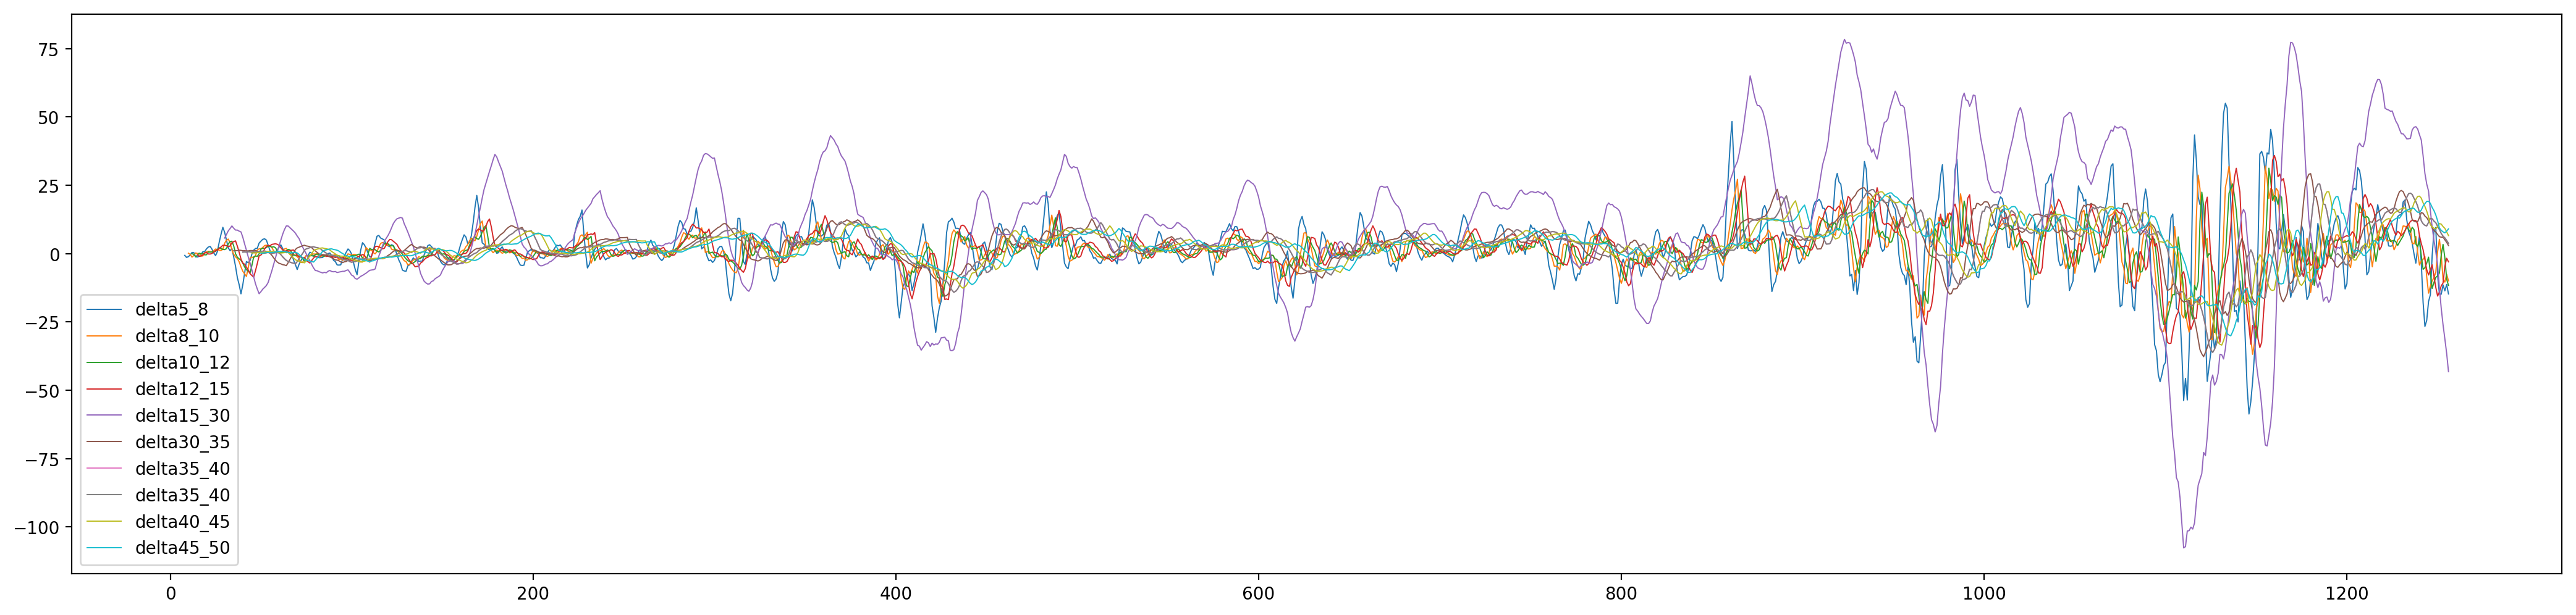

In [35]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.7)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.7)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.7)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.7)
plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.7)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.7)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.7)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.7)
plt.legend()

delta_1_2 = []
delta_1_3 =[]
delta_2_3 = []

delta_1_2.append(0)
delta_1_3.append(0)

delta_2_3.append(0)



for i in range(1,dataset_1D.shape[0]-1):
    delta_1_2.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-1,4])
        
for i in range(1,dataset_1D.shape[0]-2):
     delta_1_3.append(dataset_1D.iloc[-i,4] - dataset_1D.iloc[-i-2,4])
    
for i in range(1,dataset_1D.shape[0]-2):
     delta_2_3.append(dataset_1D.iloc[-i-1,4] - dataset_1D.iloc[-i-2,4])

delta_1_2.append(0)
delta_1_3.append(0)
delta_2_3.append(0)
delta_1_3.append(0)
delta_2_3.append(0)


len(delta_1_2),len(delta_1_3),len(delta_2_3)

dataset_1D['delta_1_2'] = delta_1_2
dataset_1D['delta_2_3'] = delta_2_3
dataset_1D['delta_1_3'] = delta_1_3

In [36]:
dataset_1D.tail()

Date      Open      High       Low     Close  Varop_Spy  Varhl_spy  \
1252  20190528  1832.275  1849.275  1827.905  1836.080     -3.805     21.370   
1253  20190529  1823.785  1829.655  1807.750  1819.715      4.070     21.905   
1254  20190530  1824.335  1829.345  1807.890  1816.275      8.060     21.455   
1255  20190531  1790.005  1795.480  1773.010  1774.865     15.140     22.470   
1256  20190603  1761.330  1766.275  1704.500  1719.745     41.585     61.775   

            RSI   75 - RSI   RSI - 25  ...  delta8_10  delta10_12  delta12_15  \
1252  59.166499  67.736397  22.263603  ...  -0.484625   -0.442667  -11.799500   
1253  28.031797  35.833501  54.166499  ...  -9.451375    3.357000  -10.786000   
1254  22.953767  66.968203  23.031797  ... -10.429750   -1.578583   -4.641583   
1255   4.281340  72.046233  17.953767  ...  -7.552875   -9.431500   -1.725000   
1256   1.352452  90.718660  -0.718660  ...  -9.980500  -11.639917   -3.011083   

      delta15_30  delta30_35  delta35_40  delta40_45  delta45_50  Peaks  \
1252  -20.048167    5.992548    7.351286   10.765556    8.482944      1   
1253  -26.063333    6.010476    6.365857    9.880444    7.945656      0   
1254  -31.210833    5.028214    5.731911    9.229708    7.589667      0   
1255  -36.571833    4.100405    4.806179    7.892583    8.241367      0   
1256  -43.188500    2.939214    3.742536    6.595639    9.024711      0   

      Valley  
1252       0  
1253       0  
1254       0  
1255       0  
1256       1  

[5 rows x 22 columns]

In [37]:
tsf = talib.TSF(dataset_1D['Close'],timeperiod=14)
type(tsf),len(tsf)

(pandas.core.series.Series, 1256)

In [38]:
delta_tsf = dataset_1D['Close'] - tsf
dataset_1D['delta_tsf'] = tsf
delta_tsf.shape

(1256,)

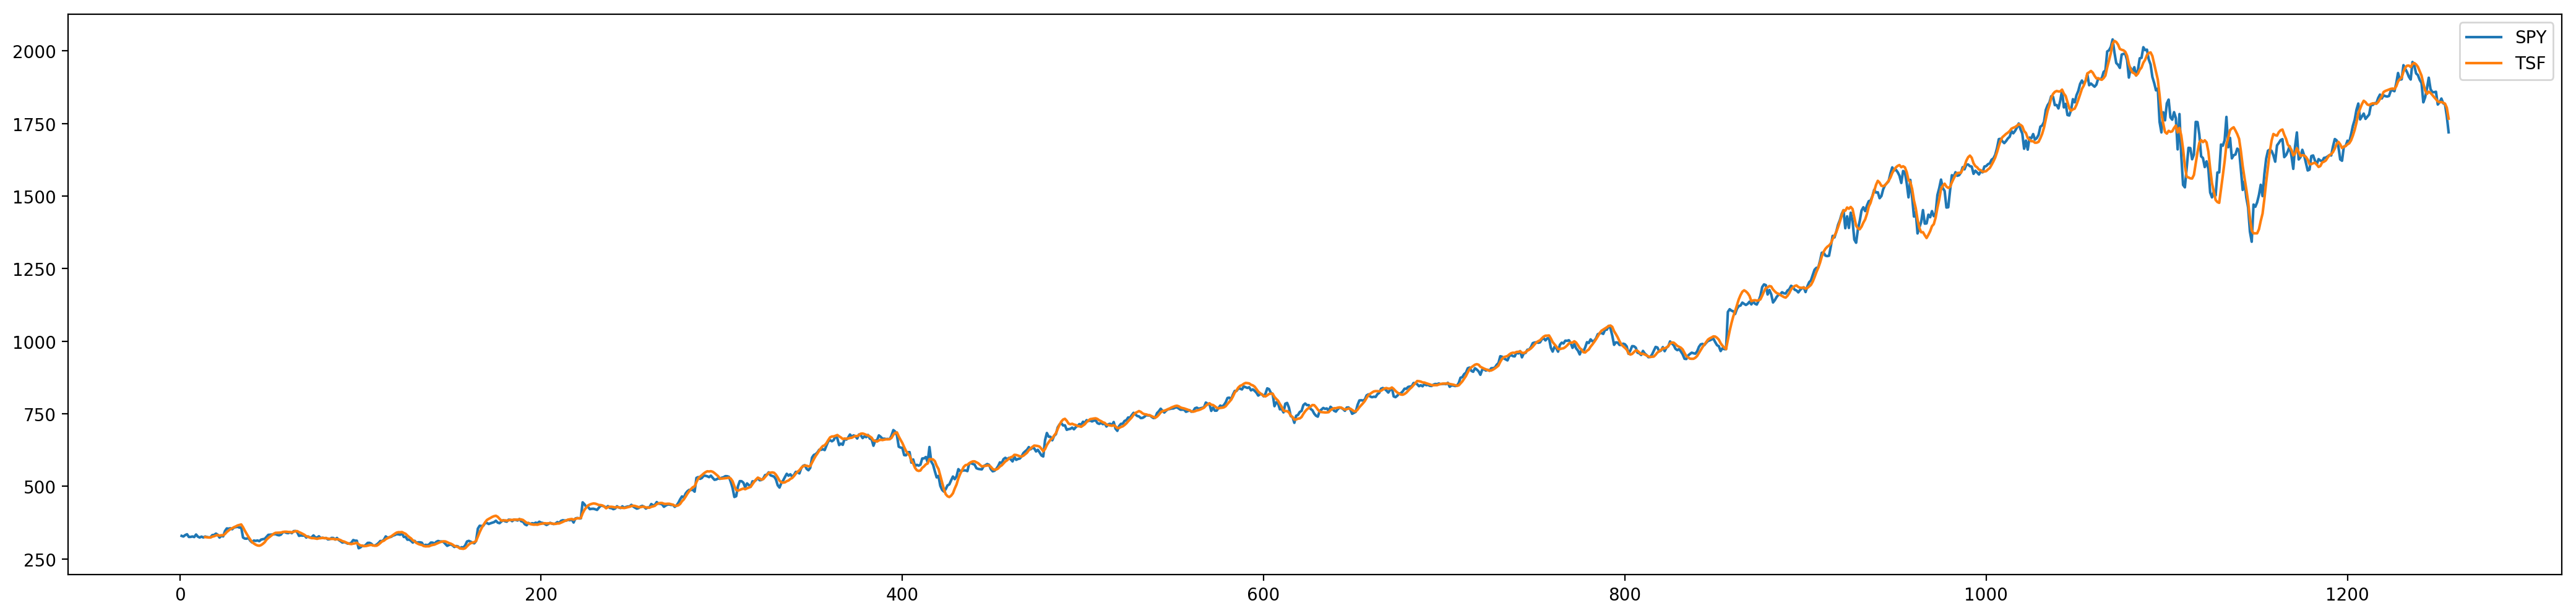

In [39]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(tsf,label='TSF')
plt.legend()
plt.show()

In [40]:
forosc = []
forosc.append(0)
for i in range(1,dataset_1D.shape[0]):
    try:
        forosc.append((dataset_1D.iloc[i,4] - tsf[i-1])*100/dataset_1D.iloc[i,4])
    except:
        forosc.append(0)
len(forosc),type(forosc)

(1256, list)

In [41]:
dataset_1D['Forcast Oscillator'] = (forosc)

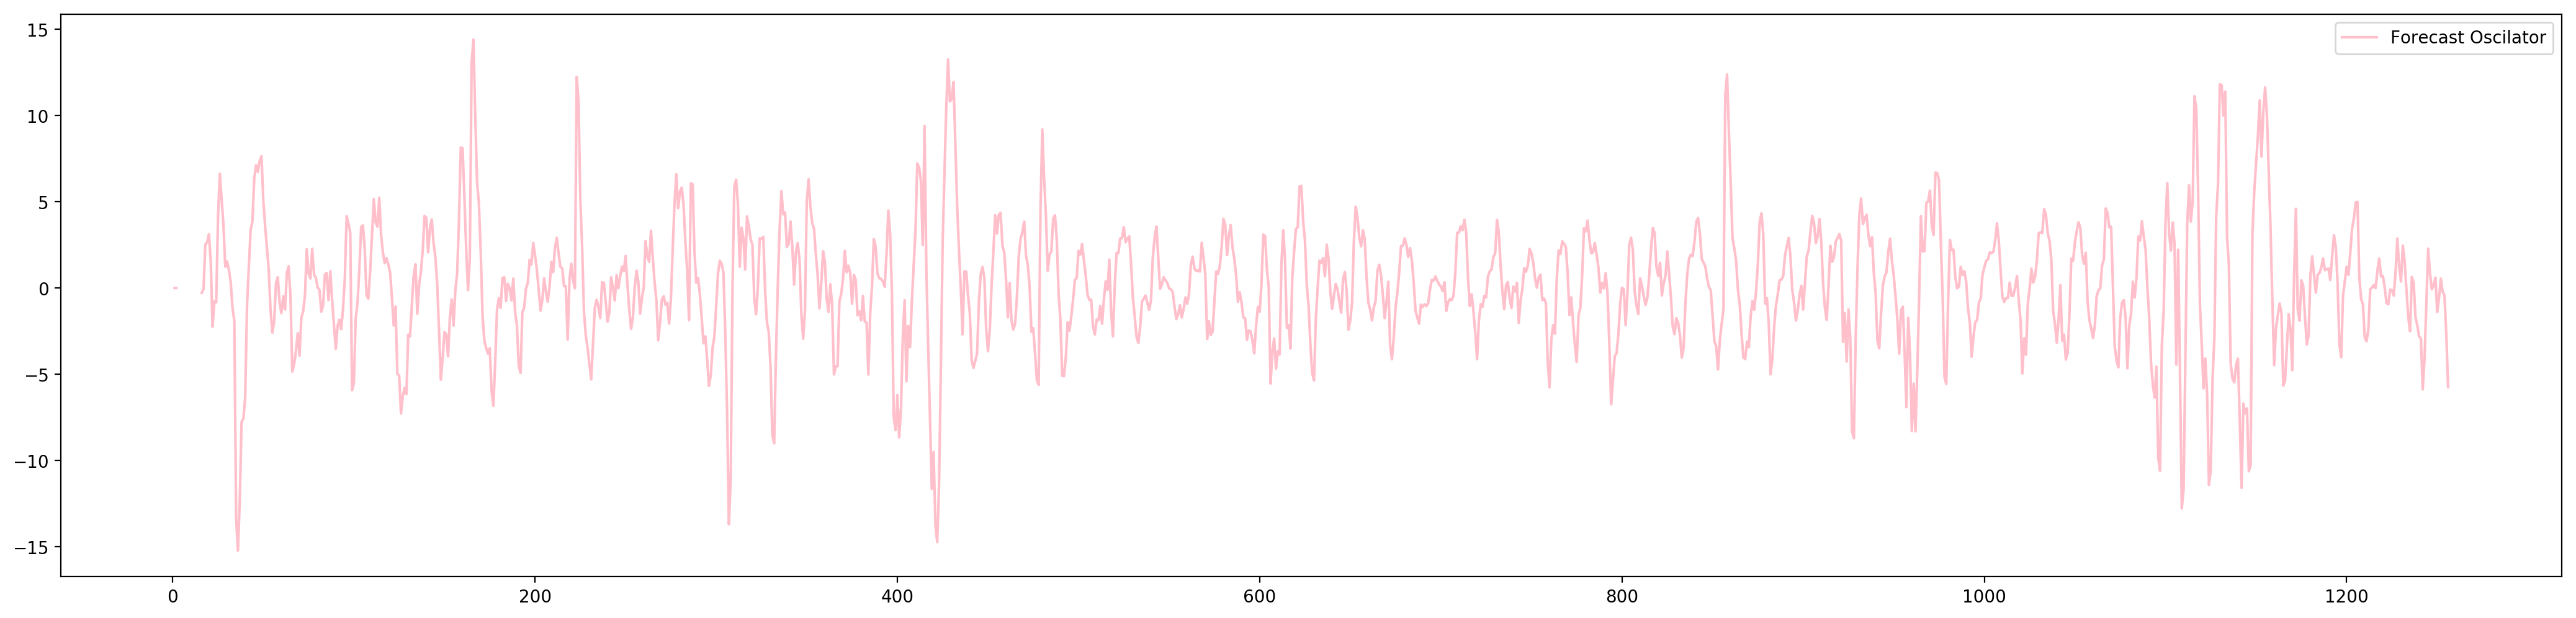

In [42]:
plt.figure(figsize=(26,6),dpi=200)
#plt.plot(dataset_1D['Close'],label = 'SPY')
#plt.plot(dataset_1D['delta_tsf'],label = 'DELTA TSF SPY')
plt.plot(dataset_1D['Forcast Oscillator'],label='Forecast Oscilator',color='pink')
plt.legend()
plt.show()

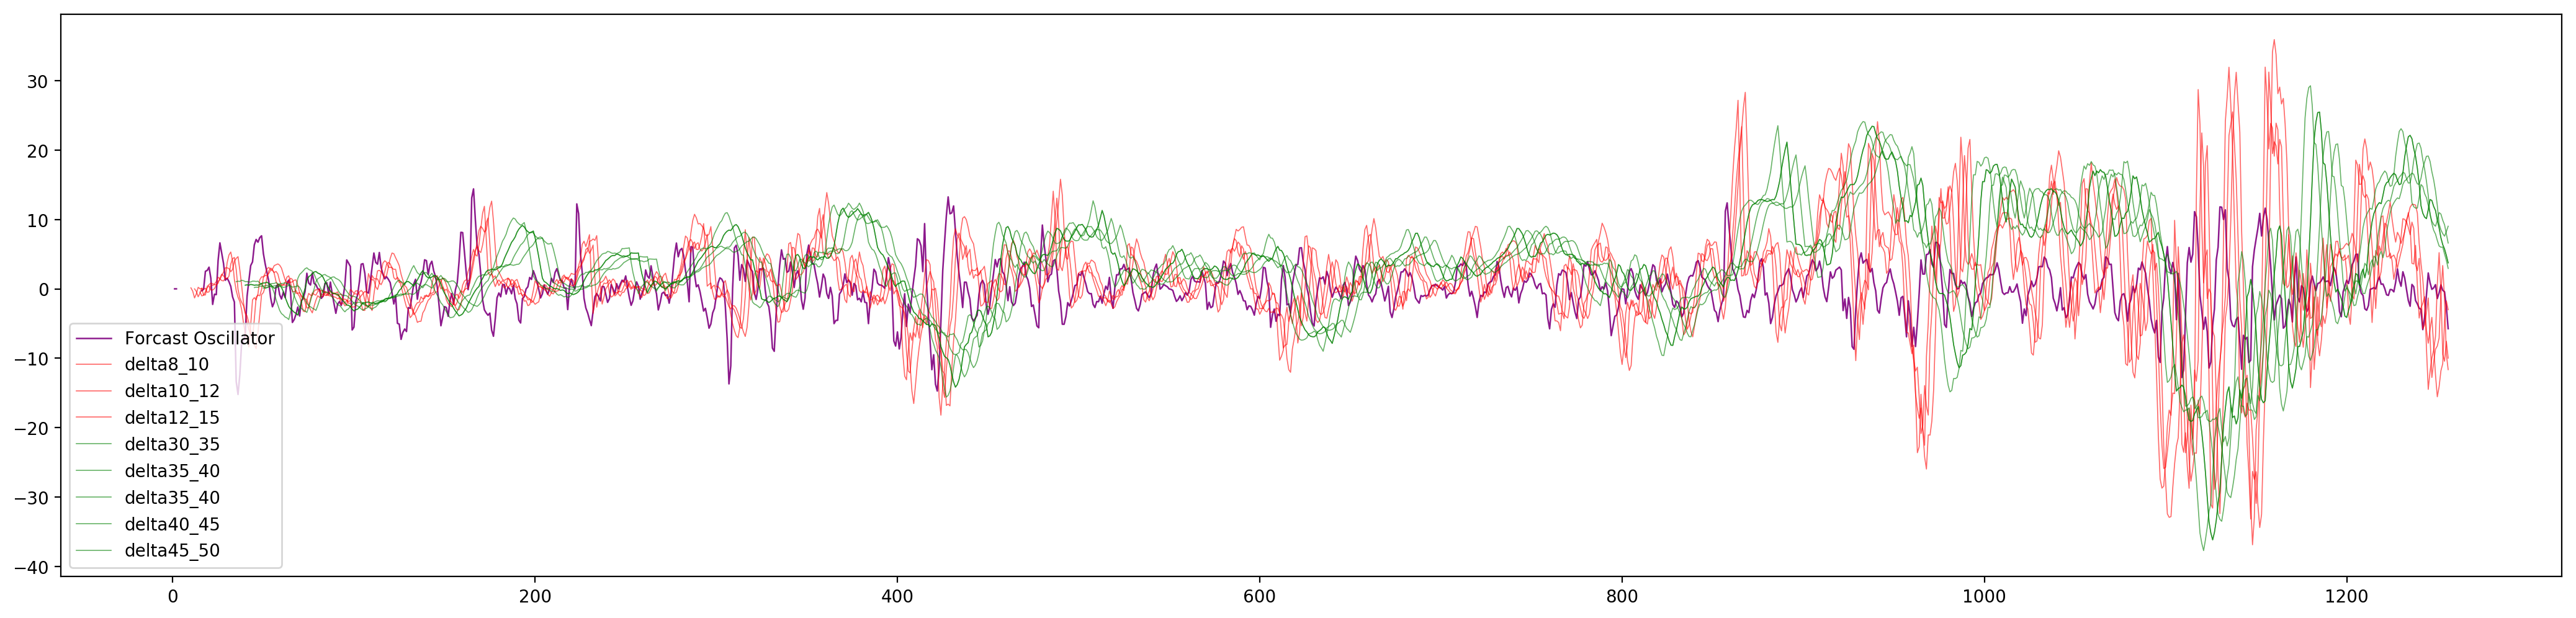

In [43]:
plt.figure(figsize=(26,6),dpi=200)
plt.plot(dataset_1D['Forcast Oscillator'],label = 'Forcast Oscillator',lw=0.9,color='purple',alpha=0.9)
#plt.plot(dataset_1D['delta5_8'],label = 'delta5_8',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta8_10'],label = 'delta8_10',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta10_12'],label = 'delta10_12',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta12_15'],label = 'delta12_15',lw=0.6,color='r',alpha=0.6)
#plt.plot(dataset_1D['delta15_30'],label = 'delta15_30',lw=0.6,color='r',alpha=0.6)
plt.plot(dataset_1D['delta30_35'],label = 'delta30_35',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta35_40'],label = 'delta35_40',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta40_45'],label = 'delta40_45',lw=0.6,color='g',alpha=0.6)
plt.plot(dataset_1D['delta45_50'],label = 'delta45_50',lw=0.6,color='g',alpha=0.6)
plt.legend()

In [44]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 1 to 1256
Data columns (total 24 columns):
Date                  1256 non-null int64
Open                  1256 non-null float64
High                  1256 non-null float64
Low                   1256 non-null float64
Close                 1256 non-null float64
Varop_Spy             1256 non-null float64
Varhl_spy             1256 non-null float64
RSI                   1254 non-null float64
75 - RSI              1254 non-null float64
RSI - 25              1254 non-null float64
BBD_Delta_Up          1248 non-null float64
delta5_8              1249 non-null float64
delta8_10             1247 non-null float64
delta10_12            1245 non-null float64
delta12_15            1242 non-null float64
delta15_30            1227 non-null float64
delta30_35            1222 non-null float64
delta35_40            1217 non-null float64
delta40_45            1212 non-null float64
delta45_50            1207 non-null float64
Peaks          

In [45]:
df.head(0)

Empty DataFrame
Columns: [Date, Open, High, Low, Close]
Index: []

In [46]:
target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,5] * dataset_1D.iloc[i,5]) < 0 :
        if (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) > 0.3: #or (df.iloc[i+1,4] - df.iloc[i,3]) > 30:
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4]) < -0.2 : #or (df.iloc[i+1,4] - df.iloc[i,2]) < -30:
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



target_up = []
target_down = []

for i in range(0,dataset_1D.shape[0]-5):
    
    if (dataset_1D.iloc[i+1,7]*dataset_1D.iloc[i,7]) < 0 :
    
        if (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] > 0.06 :
            target_up.append(1)
            target_down.append(0)
        elif (dataset_1D.iloc[i+5,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.02 or \
        (dataset_1D.iloc[i+4,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.03 or \
        (dataset_1D.iloc[i+3,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.04 or \
        (dataset_1D.iloc[i+2,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.05 or \
        (dataset_1D.iloc[i+1,4] - dataset_1D.iloc[i,4])/dataset_1D.iloc[i,4] < -0.06 :
            target_up.append(0)
            target_down.append(1)
        else:
            target_up.append(0)
            target_down.append(0)
    else :
        target_up.append(0)
        target_down.append(0) 
        
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)
target_up.append(0)
target_down.append(0)



In [47]:
len(target_up),len(target_down)

(1256, 1256)

In [48]:
dataset_1D['target_up'] = target_up  # target_up # abs(np.array(valley))#target_up
dataset_1D['target_down'] = target_down # target_down # abs(np.array(peak))#target_down

dataset_1D['target_up'].sum(),dataset_1D['target_down'].sum()

(350, 280)

In [49]:
dataset_1D['target_value'] = dataset_1D['Close']
dataset_1D = dataset_1D.drop(['Open','High','Low','Close'],axis=1)

In [50]:
dataset_1D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 1 to 1256
Data columns (total 23 columns):
Date                  1256 non-null int64
Varop_Spy             1256 non-null float64
Varhl_spy             1256 non-null float64
RSI                   1254 non-null float64
75 - RSI              1254 non-null float64
RSI - 25              1254 non-null float64
BBD_Delta_Up          1248 non-null float64
delta5_8              1249 non-null float64
delta8_10             1247 non-null float64
delta10_12            1245 non-null float64
delta12_15            1242 non-null float64
delta15_30            1227 non-null float64
delta30_35            1222 non-null float64
delta35_40            1217 non-null float64
delta40_45            1212 non-null float64
delta45_50            1207 non-null float64
Peaks                 1256 non-null int64
Valley                1256 non-null int64
delta_tsf             1243 non-null float64
Forcast Oscillator    1243 non-null float64
target_up          

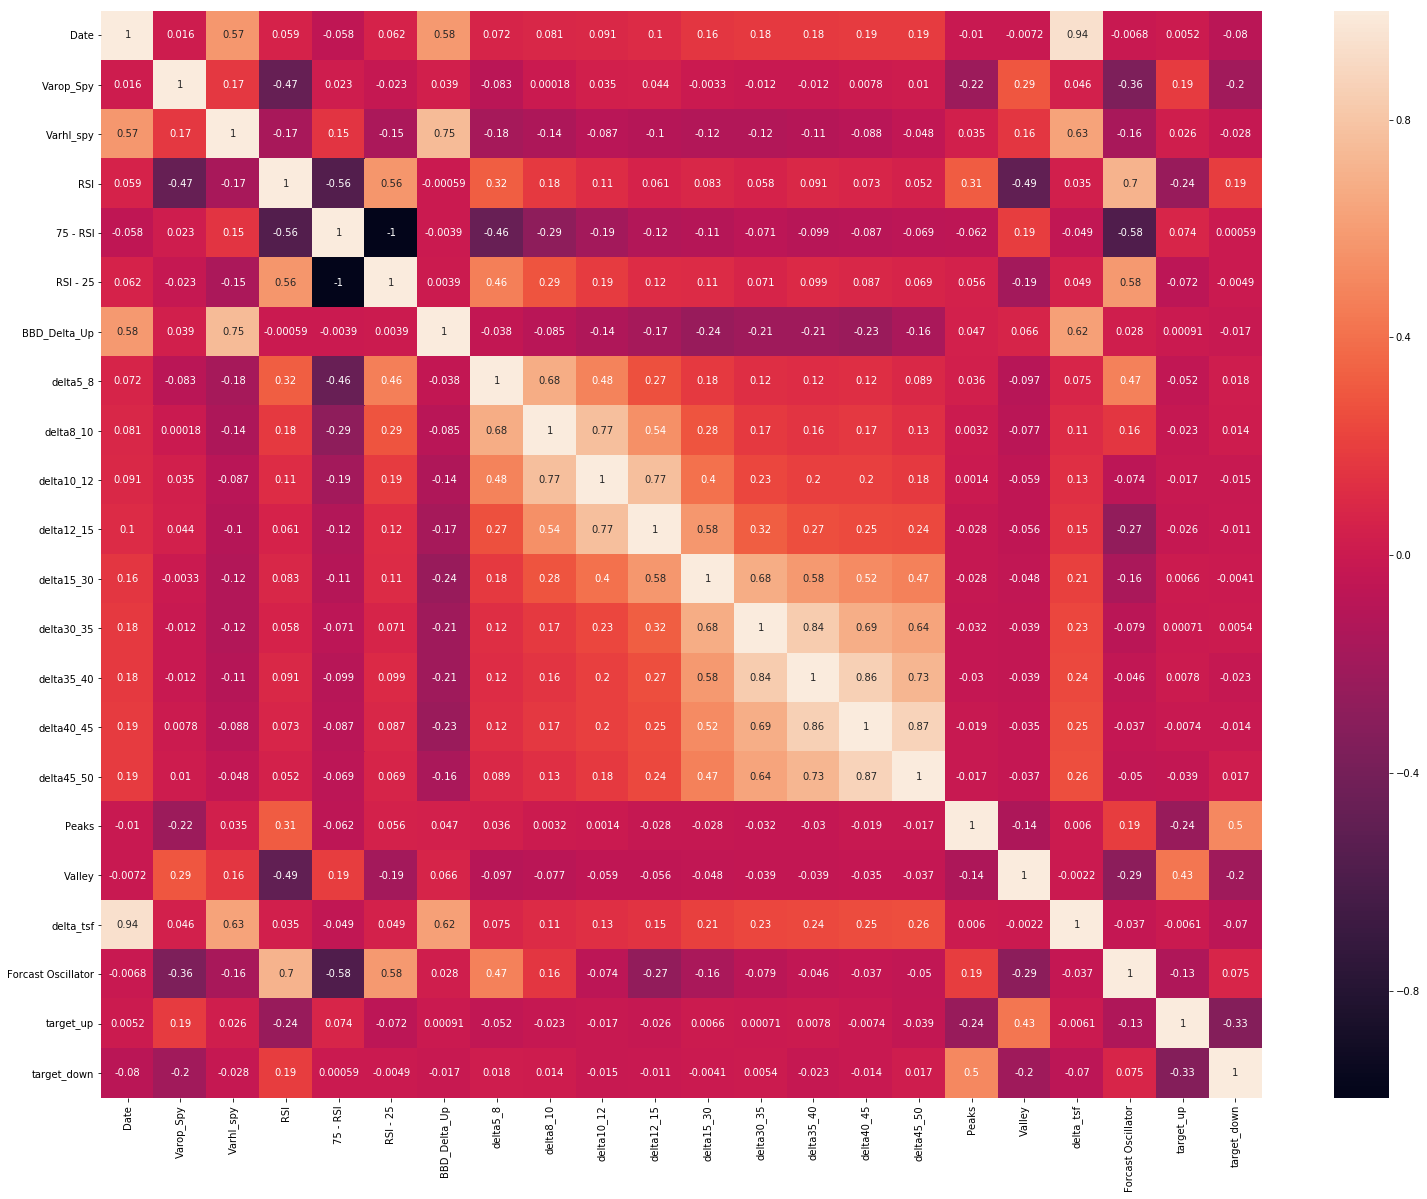

In [51]:
plt.figure(figsize=(26,20))
sns.heatmap(dataset_1D.iloc[:,:-1].corr(),annot=True)
plt.show()

In [52]:
dataset_1D.tail()

Date  Varop_Spy  Varhl_spy        RSI   75 - RSI   RSI - 25  \
1252  20190528     -3.805     21.370  59.166499  67.736397  22.263603   
1253  20190529      4.070     21.905  28.031797  35.833501  54.166499   
1254  20190530      8.060     21.455  22.953767  66.968203  23.031797   
1255  20190531     15.140     22.470   4.281340  72.046233  17.953767   
1256  20190603     41.585     61.775   1.352452  90.718660  -0.718660   

      BBD_Delta_Up   delta5_8  delta8_10  delta10_12  ...  delta35_40  \
1252     52.462173 -14.854875  -0.484625   -0.442667  ...    7.351286   
1253     55.394935 -11.467625  -9.451375    3.357000  ...    6.365857   
1254     40.472912 -13.628750 -10.429750   -1.578583  ...    5.731911   
1255     51.875082 -11.327625  -7.552875   -9.431500  ...    4.806179   
1256     81.675557 -14.751500  -9.980500  -11.639917  ...    3.742536   

      delta40_45  delta45_50  Peaks  Valley    delta_tsf  Forcast Oscillator  \
1252   10.765556    8.482944      1       0  1823.997418            0.543065   
1253    9.880444    7.945656      0       0  1821.587527           -0.212366   
1254    9.229708    7.589667      0       0  1818.470000           -0.425179   
1255    7.892583    8.241367      0       0  1804.460879           -2.632455   
1256    6.595639    9.024711      0       1  1766.744066           -5.740677   

      target_up  target_down  target_value  
1252          0            0      1836.080  
1253          0            0      1819.715  
1254          0            0      1816.275  
1255          0            0      1774.865  
1256          0            0      1719.745  

[5 rows x 23 columns]

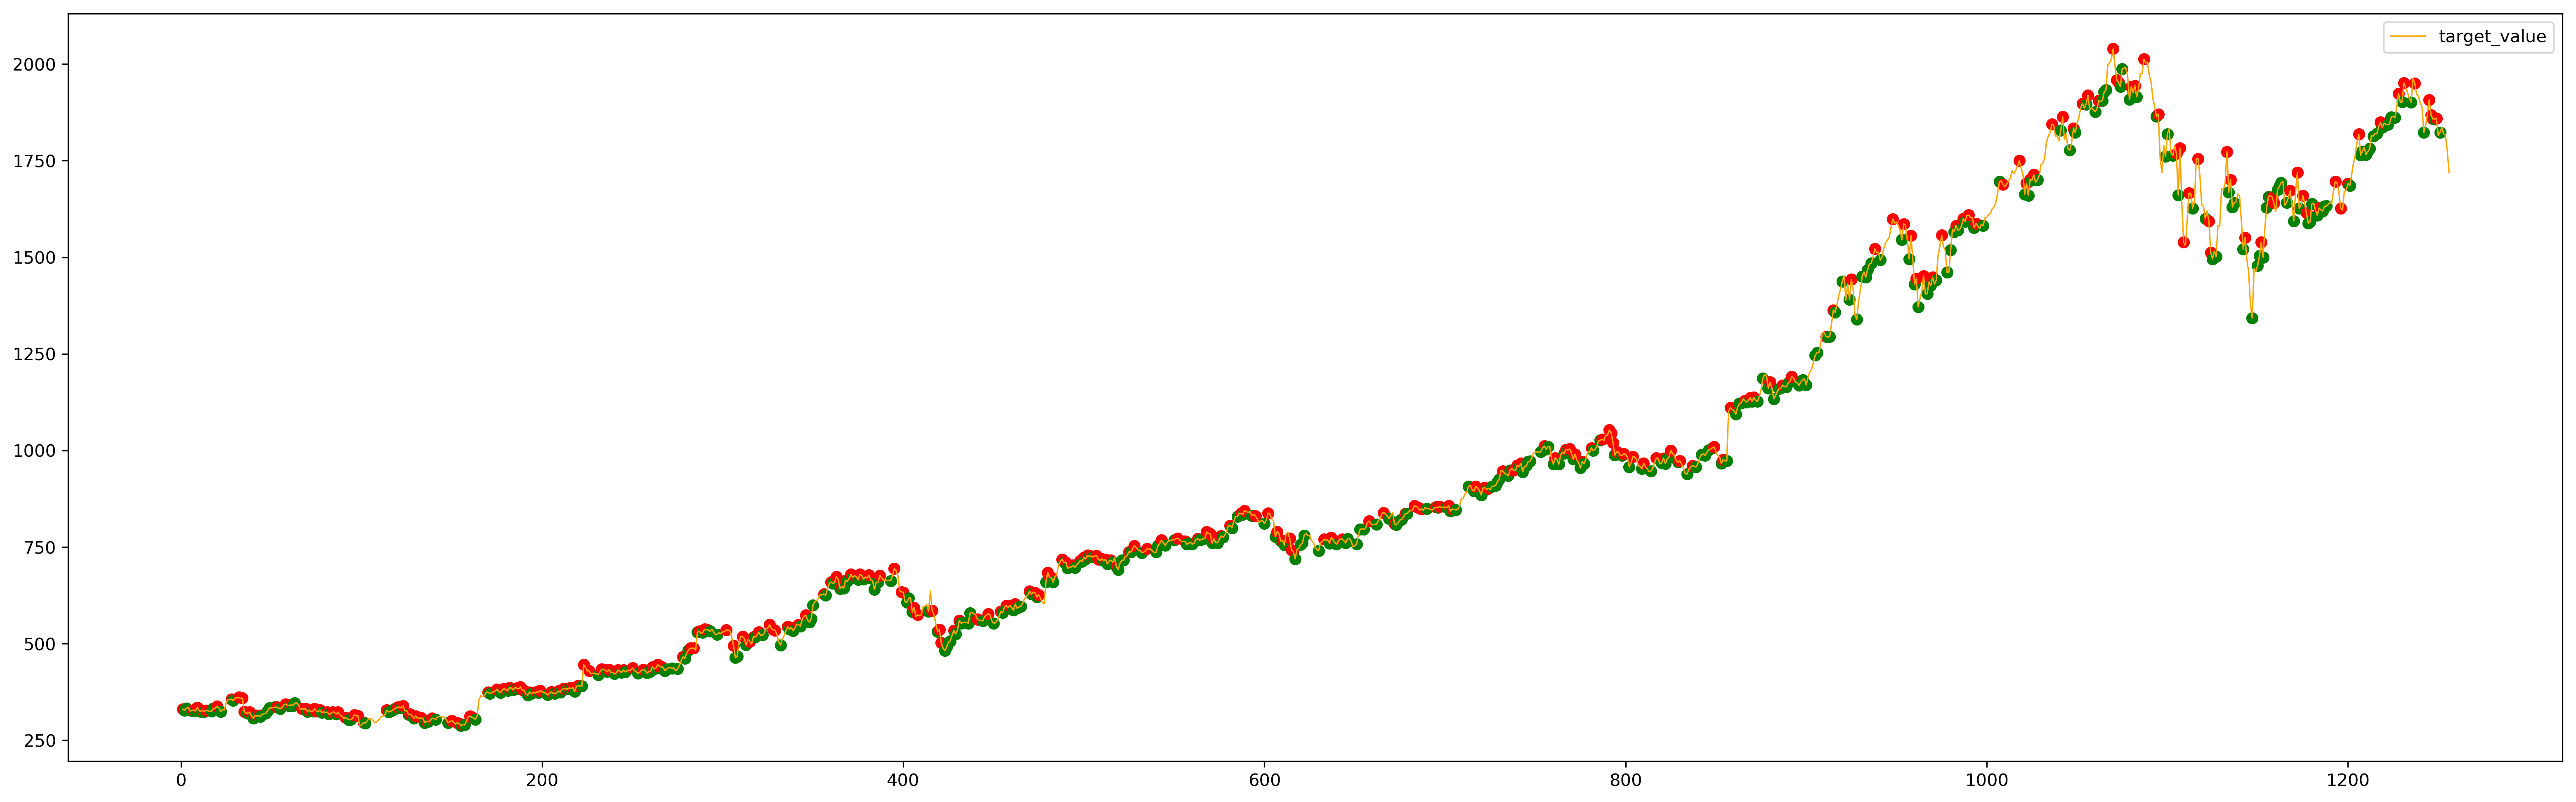

In [53]:
plt.figure(figsize=(26,8),dpi=300)
plt.plot(dataset_1D['target_value'],color='orange',lw=0.8)
for i in range(0,len(dataset_1D)):
    if dataset_1D.iloc[i,-3] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='g',marker='o')
    elif dataset_1D.iloc[i,-2] == 1:
        plt.scatter(x=dataset_1D.index[i],y=dataset_1D.iloc[i,-1],c='r',marker='o')
plt.legend()

In [54]:
dataset_1D.to_csv('data_prepared.csv')